In [90]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [91]:
table = 'main'

schema = 'score'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [92]:
df.columns

Index(['gbifID', 'score'], dtype='object')

In [93]:
x = 'inat_id_log_z_score'
y = '' 
cols = ['obsv_unique_year_count', 'obsv_unique_dates']

In [94]:
df

,gbifID,score
0,3079604030,0.313734
1,3079611217,0.313734
2,3079659298,0.313734
3,3079677289,0.313734
4,3079694709,0.399243
...,...,...
15266,5892542022,0.350722
15267,5892418388,0.325722
15268,5892542022,0.350722
15269,5892418388,0.325722


In [95]:
df.describe()

,gbifID,score
count,1.527100e+04,15146.000000
mean,4.716520e+09,0.341882
std,8.216670e+08,0.080518
min,3.079604e+09,-0.019786
25%,4.111781e+09,0.299148
50%,4.919383e+09,0.339243
75%,5.187816e+09,0.404595
max,5.897469e+09,0.738094


<Axes: xlabel='score', ylabel='Count'>

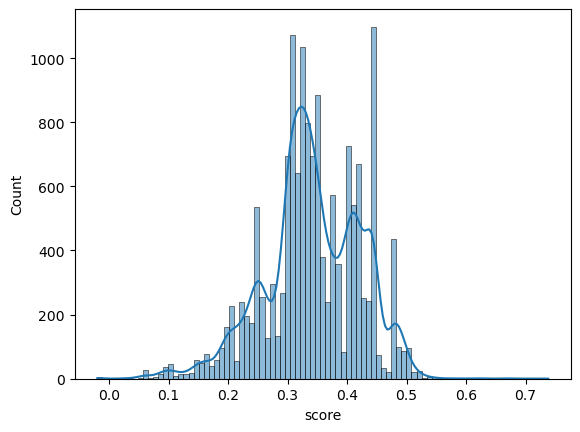

In [98]:
sns.histplot(df, x= 'score', kde= True)